# Convert (Multi)LineString to (Multi)Points

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import geopandas as gpd
import os
os.getcwd()

'/Users/lukaszkielar/Python/geopandas/my_files'

In [3]:
gpd.datasets.available

['naturalearth_admin_boundary_lines',
 'naturalearth_airports',
 'naturalearth_cities',
 'naturalearth_lowres',
 'european_nuts_boundaries',
 'nybb']

In [9]:
polygon_path = gpd.datasets.get_path('naturalearth_lowres')
world_gdf = gpd.read_file(polygon_path)

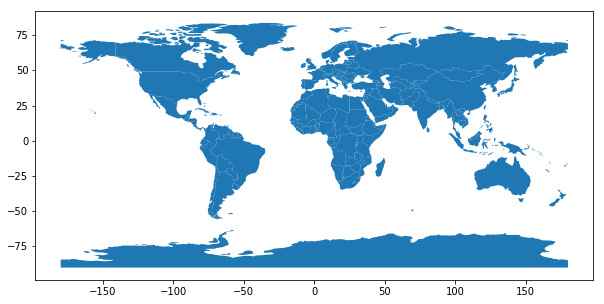

In [162]:
world_gdf.plot(figsize=(10,10))

In [11]:
world_gdf.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


In [12]:
len(world_gdf)

177

In [13]:
world_gdf.geometry.type.head()

0    MultiPolygon
1         Polygon
2         Polygon
3    MultiPolygon
4    MultiPolygon
dtype: object

## Australia

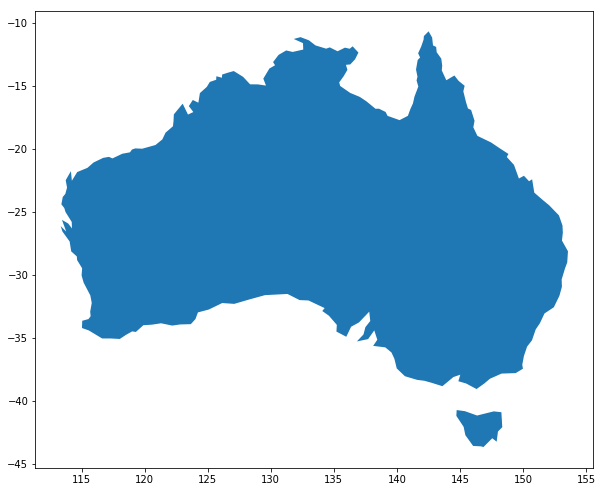

In [15]:
australia_gdf = world_gdf[world_gdf['name']=='Australia']
australia_gdf.plot(figsize=(10,10))

In [16]:
australia_gdf

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
137,23232413,Oceania,Australia,AUS,1189000.0,(POLYGON ((147.6892594748842 -40.8082581520226...


## Cut layer into pieces

In [133]:
australia_gdf_copy = australia_gdf.copy(deep=True)

In [132]:
from geopandas.tools.topology import _katana, _layer_katana

### Base geometry

In [134]:
australia_gdf.geometry.item().type

'MultiPolygon'

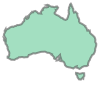

In [135]:
australia_gdf.geometry.item()

In [136]:
australia_gdf.geometry.item().area

695.5455009461047

In [137]:
australia_gdf.geometry.bounds

,minx,miny,maxx,maxy
137,113.338953,-43.634597,153.569469,-10.668186


### New geometry

In [138]:
new_geom = _katana(australia_gdf.geometry.item(), threshold=5)

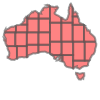

In [139]:
new_geom

In [140]:
type(new_geom)

shapely.geometry.multipolygon.MultiPolygon

In [141]:
new_geom.area

695.5455009461045

In [142]:
new_geom.geoms

In [143]:
(new_geom.area / australia_gdf.geometry.item().area)*100

99.99999999999999

### New GeoDataFrame

#### Without explode

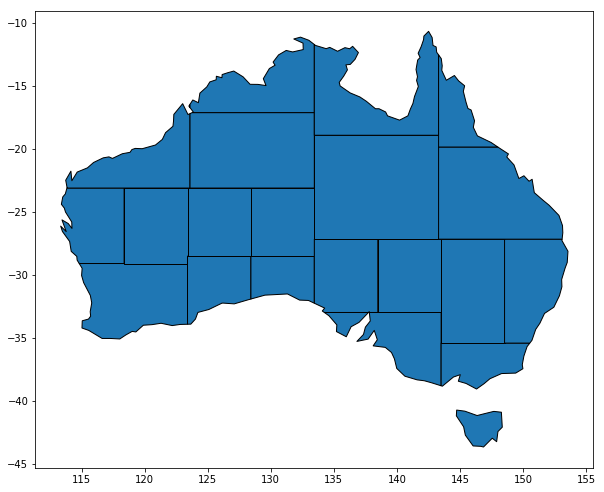

In [155]:
australia_katana_gdf = _layer_katana(australia_gdf_copy, threshold=10)
australia_katana_gdf.plot(figsize=(10,10), edgecolor='black')

In [156]:
australia_katana_gdf

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
137,23232413,Oceania,Australia,AUS,1189000.0,(POLYGON ((123.3965820659329 -33.8977086542152...


#### Explode

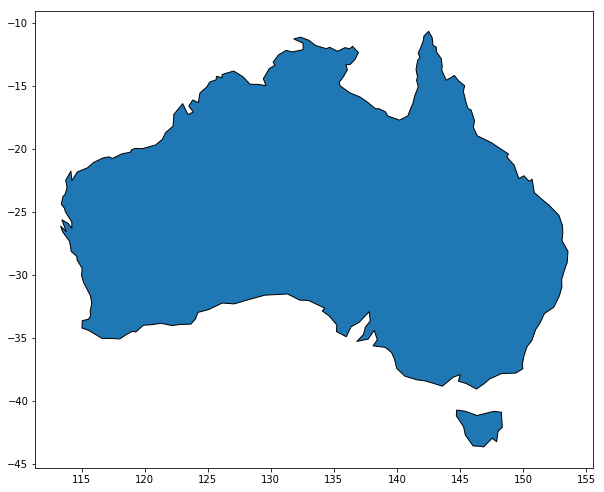

In [160]:
australia_katana_gdf = _layer_katana(australia_gdf_copy, threshold=70, explode=True)
australia_katana_gdf.plot(figsize=(10,10), edgecolor='black')

In [161]:
australia_katana_gdf

pop_est continent       name iso_a3  gdp_md_est  \
137 0  23232413   Oceania  Australia    AUS   1189000.0   
    1  23232413   Oceania  Australia    AUS   1189000.0   

                                                geometry  
137 0  POLYGON ((147.6892594748842 -40.80825815202267...  
    1  POLYGON ((126.1487138205011 -32.21596607842059...

### World katana

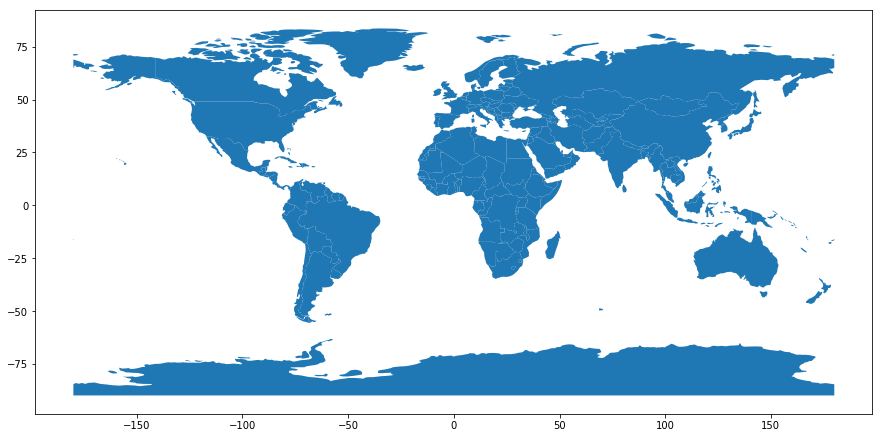

In [165]:
world_gdf.plot(figsize=(15,15))

In [174]:
world_gdf.geometry.area.min()

0.30151572675262428

/Users/lukaszkielar/anaconda3/envs/geopandas_dev/lib/python3.5/site-packages/pandas/core/series.py:3181: UserWarning: Polygon geometry hasn't been modified! Try to decrease threshold.
  f = lambda x: func(x, *args, **kwds)


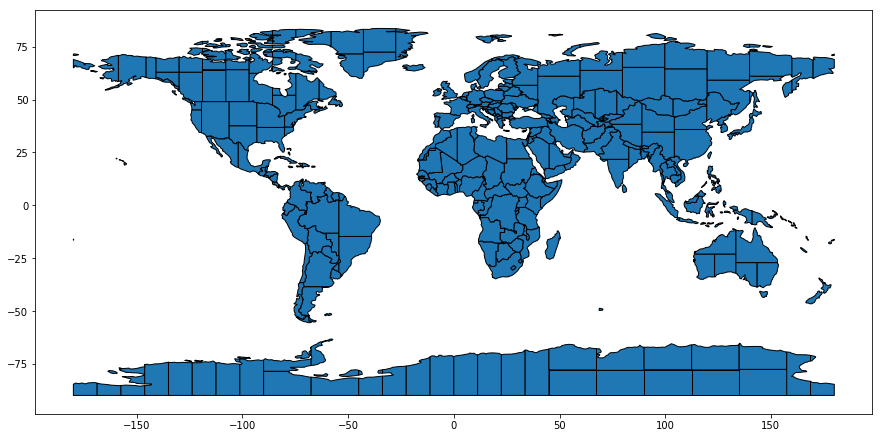

In [179]:
world_katana_gdf = _layer_katana(world_gdf, threshold=20, explode=True)
world_katana_gdf.plot(figsize=(15,15), edgecolor='black')

In [180]:
world_gdf.area.sum()

21496.990987992736

In [181]:
world_katana_gdf.area.sum()

21496.990987992729

In [182]:
(world_katana_gdf.area.sum() / world_gdf.area.sum())*100

99.999999999999972